In [1]:
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv',encoding = "latin-1")

In [5]:
#-1 leri silme
print(rating.rating.unique())
new_rating=rating[rating.rating!=-1]
df_rating=pd.merge(new_rating,anime.drop('rating',axis=1),on='anime_id')
print(df_rating.rating.unique())

[-1 10  8  6  9  7  3  5  4  1  2]
[10  6  2  7  9  8  4  5  3  1]


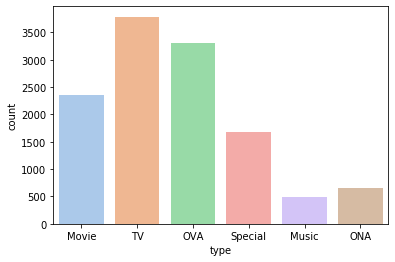

In [3]:
#type histogram garfik
sns.countplot(x= 'type', data=anime, palette="pastel") # graf Çizdir(type)

In [6]:
rating_count=pd.DataFrame(df_rating.groupby(['anime_id'])['rating'].sum())
top10=rating_count.sort_values('rating',ascending=False).head(10)
x=pd.merge(top10,df_rating,on='anime_id')

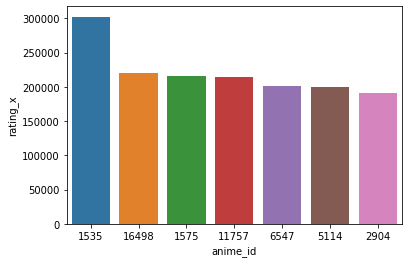

In [7]:
##En çok değerlendirilen(rating alan) Filmler
Most_popular = x.drop_duplicates(subset=['anime_id'])
Most_popular=Most_popular.iloc[0:7,:]
x=Most_popular['anime_id']
y=Most_popular['rating_x']
sns.barplot(x,y,order=x )  #graf çizdir (Most popular)

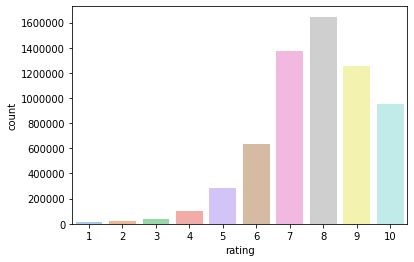

In [8]:
#ratings histogram
sns.countplot(x= 'rating', data=df_rating, palette="pastel")

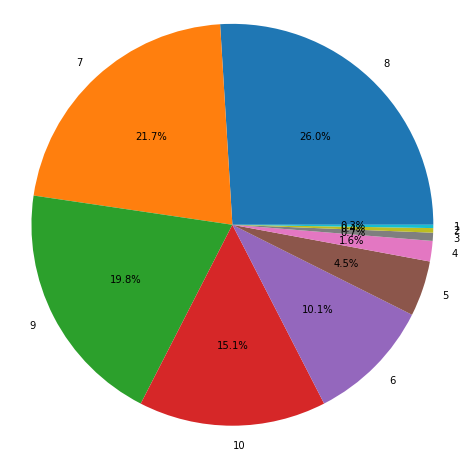

In [9]:
#çember
data=df_rating['rating'].value_counts()
labels=data.index
sizes=data.values
explode = None  # explode 1st slice
plt.subplots(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=False, startangle=0)
plt.axis('equal')
plt.show()

In [10]:
#name ,rating  , num of ratings
ratings = pd.DataFrame(df_rating.groupby('name')['rating'].mean())
#dataFrame num of rating sütünü eklemek
ratings['num of ratings'] = pd.DataFrame(df_rating.groupby('name')['rating'].count())
print(ratings.head(10))

                                                      rating  num of ratings
name                                                                        
&quot;0&quot;                                       4.764706              17
&quot;Aesop&quot; no Ohanashi yori: Ushi to Kae...  1.000000               1
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...  7.343307             635
&quot;Bungaku Shoujo&quot; Memoire                  7.744713             662
&quot;Bungaku Shoujo&quot; Movie                    7.840154            1295
&quot;Eiji&quot;                                    6.285714              14
.hack//G.U. Returner                                7.024621             528
.hack//G.U. Trilogy                                 7.458880             839
.hack//G.U. Trilogy: Parody Mode                    6.707031             256
.hack//Gift                                         6.579193             644


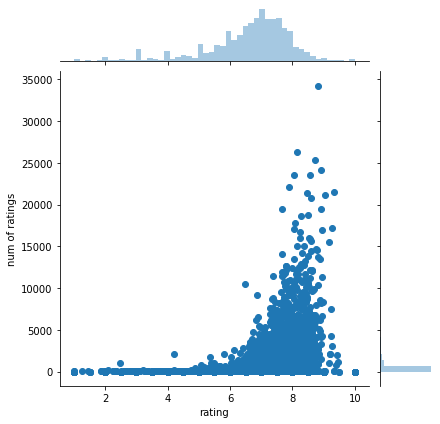

In [11]:
#ratings sactter
sns.jointplot(x='rating',y='num of ratings',data=ratings)